\newpage

# Question

### 1)

Our target variable measure the severity of heart disease which can be defined as binary classification problem. Our goal would then to be able to predict the probability of heart disease. This means we can carry out a logistic regression and a random forest classifier to predict the presence and absence of heart disease.  

### 2)

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
  
heart_disease = fetch_ucirepo(id=45) 
 
X = heart_disease.data.features 
y = heart_disease.data.targets 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)



It is true that there are missing values for 'ca' and 
true that there are missing values for 'thal' in the dataset.
Length of X before transformations: 303


### 3)

We have 13 features and 1 target variable. Starting with our features, we have age (age in years), sex (1 = male; 0 = female), cp (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic), trestbps (resting blood pressure in mm Hg on admission to the hospital), chol (serum cholestoral in mg/dl), fbs (fasting blood sugar > 120 mg/dl where 1 = true; 0 = false), restecg (resting electrocardiographic results), exang (exercise induced angina), oldpeak (ST depression induced by exercise relative to rest), slope (1 = upsloping, 2 = flat, 3 = downsloping), ca (number of major vessels colored by floursopy), thal (3 = normal; 6 = fixed defect; 7 = reversable defect). Finally our target variable, 'num', is the diagnosis of heart disease.

In [68]:
print(f"Observations in X: {len(X)}")
print(f"Summary of X:\n{X.describe()}")
print(f"Summary of y:\n{y.describe()}")

Observations in X: 303
Summary of X:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

We find that the average age of patients is 54.4 years old, with a standard deviation of 9.1 years.

In [69]:
print(f"Data Types of X: \n{X.dtypes}")
print(f"\nData Types of y: \n{y.dtypes}")

Data Types of X: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data Types of y: 
num    int64
dtype: object


All of our data types in X are numerical but some representing categorical variables.

### 4)

In [70]:
print(f"y before transformation: {y['num'].value_counts()}")
y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)
print(f"y before transformation: {y['num'].value_counts()}")

y before transformation: num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
y before transformation: num
0    164
1    139
Name: count, dtype: int64


C:\Users\JC\AppData\Local\Temp\ipykernel_25828\2854447611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)


### 5)

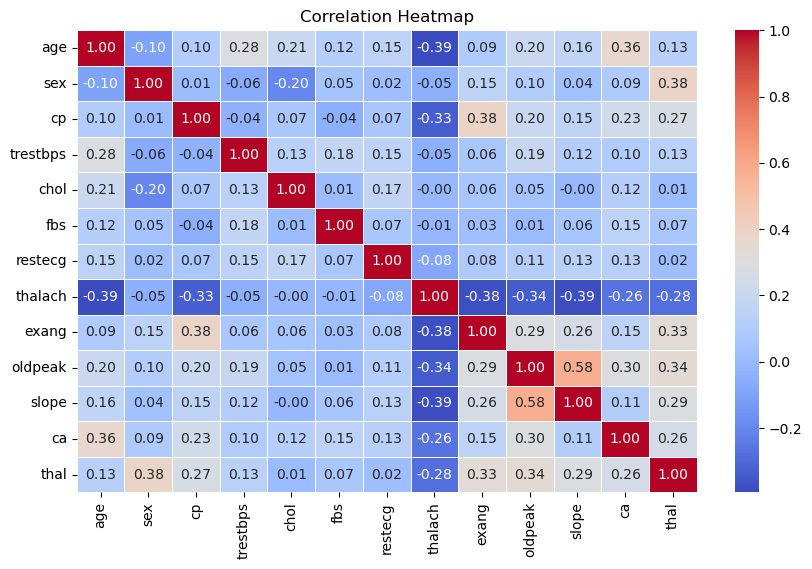

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


From this correlation matrix, we can conclude that thalach (max heart rate) has a strong negative correlation (-0.39) with age and oldpeak. We can assume that younger individuals tend to have a higher heart rate, while those with more severe heart disease (higher oldpeak) have lower thalach. We also found that ca (number of major vessels) has a strong positive correlation (0.36) with age. We can say that older individuals are more likely to have more blocked vessels. 

### 6)

In [72]:
X.dropna(subset=['ca', 'thal'], inplace=True)

print(f"Length of X after transformations: {len(X)}")

Length of X after transformations: 297


C:\Users\JC\AppData\Local\Temp\ipykernel_25828\2589721772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['ca', 'thal'], inplace=True)


### 7)